In [1]:
#import libralis

import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [7]:
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

def api_crypto_pull():
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2236b339-17f3-4044-9c43-755e767b9b43',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      return data
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      return e


# Data Prepare:

In [9]:
data = api_crypto_pull()
type(data)

dict

In [10]:
# Allows you to see all the columns, not just like 15

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
# Normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now',utc=True)

# Change the scientific notation of the numbers 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9791,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19185575.00000,19185575.00000,NaN,1,NaN,NaN,None,2022-10-21T17:44:00.000Z,19135.59408,33447933220.56089,45.51220,-0.05216,0.04685,-1.12689,-1.55043,-10.00221,-13.37264,367127375372.06793,40.01650,401847475658.84003,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
1,1027,Ethereum,ETH,ethereum,6144,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-21T17:44:00.000Z,1297.29817,11163907764.45943,27.82620,0.02984,0.79358,-0.71922,-5.31039,-17.64071,-13.69132,158755388841.00540,17.30420,158755388841.01001,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
2,825,Tether,USDT,tether,41132,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68452659679.34373,70146125803.79471,NaN,3,NaN,NaN,None,2022-10-21T17:44:00.000Z,1.00005,43165018445.24784,36.02350,0.00066,0.00465,-0.00754,-0.00631,0.00798,0.00018,68455904231.79755,7.46520,70149450623.98000,None,2022-10-21T17:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-21 17:47:01.689542+00:00
3,3408,USD Coin,USDC,usd-coin,6576,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43913200086.94491,43913200086.94491,NaN,4,NaN,NaN,None,2022-10-21T17:44:00.000Z,1.00008,3294032544.74700,22.75270,-0.00284,0.00720,0.00384,-0.01163,0.01830,0.00542,43916659627.95584,4.78690,43916659627.96000,None,2022-10-21T17:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-21 17:47:01.689542+00:00
4,1839,BNB,BNB,bnb,1129,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159980982.21963,159980982.21963,NaN,5,NaN,NaN,None,2022-10-21T17:44:00.000Z,269.74922,632529288.58359,20.90120,-0.03750,-0.33750,-0.23191,0.02432,-8.82882,6.30038,43154745530.42984,4.70380,53949844452.37000,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49887015710.00000,99989258607.00000,NaN,6,NaN,NaN,None,2022-10-21T17:44:00.000Z,0.45017,2030303559.14464,48.64960,0.80687,-1.06425,-8.88928,13.67340,33.76390,27.63305,22457708519.12442,2.44790,45017141633.96000,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
6,4687,Binance USD,BUSD,binance-usd,5315,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-21T17:44:00.000Z,1.00063,6214137626.62609,16.33990,0.10692,-0.00554,0.07500,0.03141,0.04812,0.07655,21641740035.13115,2.36000,21641740035.13000,None,2022-10-21T17:44:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-21 17:47:01.689542+00:00
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34301087248.49900,35045020830.32300,NaN,8,NaN,NaN,None,2022-10-21T17:44:00.000Z,0.34450,620985190.13916,53.16760,0.74454,-1.30570,-7.04984,-23.03839,-23.50865,-28.32017,11816644847.99264,1.28800,15502395428.67000,None,2022-10-21T17

In [12]:
# Use this if you just want to keep it in a dataframe

def api_runner_dataframe():
    global df
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now',utc=True)
    pd.set_option('display.float_format', lambda x: '%.5f' % x)
    df = pd.concat((df, df2))  # df.append(df2)


In [30]:
# Use this if you want to create a csv and append data to it
    
def api_runner_csv():
    global df

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now',utc=True)
    pd.set_option('display.float_format', lambda x: '%.5f' % x)
    df

    if not os.path.isfile(r'C:\Users\Oadi7\Desktop\Data Science\Data Analyst Portfolio Projects\Automating Crypto Website API Pull Using Python\API.csv'):
        df.to_csv(r'C:\Users\Oadi7\Desktop\Data Science\Data Analyst Portfolio Projects\Automating Crypto Website API Pull Using Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Oadi7\Desktop\Data Science\Data Analyst Portfolio Projects\Automating Crypto Website API Pull Using Python\API.csv', mode='a', header=False)
        
    #Then to read in the file: 
    df = pd.read_csv(r'C:\Users\Oadi7\Desktop\Data Science\Data Analyst Portfolio Projects\Automating Crypto Website API Pull Using Python\API.csv')

In [13]:
import os 
from time import time
from time import sleep


# 333 is daily credit limit for Basic Plan
for i in range(333):
    api_crypto_pull()
    api_runner_dataframe()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9791,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19185575.00000,19185575.00000,NaN,1,NaN,NaN,None,2022-10-21T17:44:00.000Z,19135.59408,33447933220.56089,45.51220,-0.05216,0.04685,-1.12689,-1.55043,-10.00221,-13.37264,367127375372.06793,40.01650,401847475658.84003,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
1,1027,Ethereum,ETH,ethereum,6144,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-21T17:44:00.000Z,1297.29817,11163907764.45943,27.82620,0.02984,0.79358,-0.71922,-5.31039,-17.64071,-13.69132,158755388841.00540,17.30420,158755388841.01001,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
2,825,Tether,USDT,tether,41132,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68452659679.34373,70146125803.79471,NaN,3,NaN,NaN,None,2022-10-21T17:44:00.000Z,1.00005,43165018445.24784,36.02350,0.00066,0.00465,-0.00754,-0.00631,0.00798,0.00018,68455904231.79755,7.46520,70149450623.98000,None,2022-10-21T17:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-21 17:47:01.689542+00:00
3,3408,USD Coin,USDC,usd-coin,6576,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43913200086.94491,43913200086.94491,NaN,4,NaN,NaN,None,2022-10-21T17:44:00.000Z,1.00008,3294032544.74700,22.75270,-0.00284,0.00720,0.00384,-0.01163,0.01830,0.00542,43916659627.95584,4.78690,43916659627.96000,None,2022-10-21T17:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-21 17:47:01.689542+00:00
4,1839,BNB,BNB,bnb,1129,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159980982.21963,159980982.21963,NaN,5,NaN,NaN,None,2022-10-21T17:44:00.000Z,269.74922,632529288.58359,20.90120,-0.03750,-0.33750,-0.23191,0.02432,-8.82882,6.30038,43154745530.42984,4.70380,53949844452.37000,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49887015710.00000,99989258607.00000,NaN,6,NaN,NaN,None,2022-10-21T17:44:00.000Z,0.45017,2030303559.14464,48.64960,0.80687,-1.06425,-8.88928,13.67340,33.76390,27.63305,22457708519.12442,2.44790,45017141633.96000,None,2022-10-21T17:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 17:47:01.689542+00:00
6,4687,Binance USD,BUSD,binance-usd,5315,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-21T17:44:00.000Z,1.00063,6214137626.62609,16.33990,0.10692,-0.00554,0.07500,0.03141,0.04812,0.07655,21641740035.13115,2.36000,21641740035.13000,None,2022-10-21T17:44:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-21 17:47:01.689542+00:00
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34301087248.49900,35045020830.32300,NaN,8,NaN,NaN,None,2022-10-21T17:44:00.000Z,0.34450,620985190.13916,53.16760,0.74454,-1.30570,-7.04984,-23.03839,-23.50865,-28.32017,11816644847.99264,1.28800,15502395428.67000,None,2022-10-21T17

# Data Process:

In [15]:
# Now let's look at the coin trends over time
# First we groupby each coin with average percent_change for each time interval

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05216,0.04685,-1.12689,-1.55043,-10.00221,-13.37264
Ethereum,0.02984,0.79358,-0.71922,-5.31039,-17.64071,-13.69132
Tether,0.00066,0.00465,-0.00754,-0.00631,0.00798,0.00018
USD Coin,-0.00284,0.00720,0.00384,-0.01163,0.01830,0.00542
BNB,-0.03750,-0.33750,-0.23191,0.02432,-8.82882,6.30038
XRP,0.80687,-1.06425,-8.88928,13.67340,33.76390,27.63305
Binance USD,0.10692,-0.00554,0.07500,0.03141,0.04812,0.07655
Cardano,0.74454,-1.30570,-7.04984,-23.03839,-23.50865,-28.32017
Solana,0.43641,-2.94326,-8.62757,-13.23631,-19.12426,-29.06434


In [16]:
# Second for viz the coin trends over time 
# we need to mainplute dataframe as pivot table
# So, we need to convert each average percent_change columns to rows 
# so, we use the stack 

df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.05216
             quote.USD.percent_change_24h     0.04685
             quote.USD.percent_change_7d     -1.12689
             quote.USD.percent_change_30d    -1.55043
             quote.USD.percent_change_60d   -10.00221
             quote.USD.percent_change_90d   -13.37264
Ethereum     quote.USD.percent_change_1h      0.02984
             quote.USD.percent_change_24h     0.79358
             quote.USD.percent_change_7d     -0.71922
             quote.USD.percent_change_30d    -5.31039
             quote.USD.percent_change_60d   -17.64071
             quote.USD.percent_change_90d   -13.69132
Tether       quote.USD.percent_change_1h      0.00066
             quote.USD.percent_change_24h     0.00465
             quote.USD.percent_change_7d     -0.00754
             quote.USD.percent_change_30d    -0.00631
             quote.USD.percent_change_60d     0.00798
             quote.USD.percent_change_90

In [17]:
# But the type of stack is series
type(df4)

pandas.core.series.Series

In [18]:
# So, we need to convert it to dataframe again
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.05216
            quote.USD.percent_change_24h   0.04685
            quote.USD.percent_change_7d   -1.12689
            quote.USD.percent_change_30d  -1.55043
            quote.USD.percent_change_60d -10.00221
            quote.USD.percent_change_90d -13.37264
Ethereum    quote.USD.percent_change_1h    0.02984
            quote.USD.percent_change_24h   0.79358
            quote.USD.percent_change_7d   -0.71922
            quote.USD.percent_change_30d  -5.31039
            quote.USD.percent_change_60d -17.64071
            quote.USD.percent_change_90d -13.69132
Tether      quote.USD.percent_change_1h    0.00066
            quote.USD.percent_change_24h   0.00465
            quote.USD.percent_change_7d   -0.00754
            quote.USD.percent_change_30d  -0.00631
            quote.USD.percent_change_60d   0.00798
            quote.USD.percent_change_90d   0.00018
USD Coin    quote.USD.percent_change_1h   -0.00284
            quote.USD.percent_change_24h   0.00720
            quote.USD.percent_change_7d    0.00384
            quote.USD.percent_change_30d  -0.01163
            quote.USD.percent_change_60d   0.01830
            quote.USD.percent_change_90d   0.00542
BNB         quote.USD.percent_change_1h   -0.03750
            quote.USD.percent_change_24h  -0.33750
            quote.USD.percent_change_7d   -0.23191
            quote.USD.percent_change_30d   0.02432
            quote.USD.percent_change_60d  -8.82882
            quote.USD.percent_change_90d   6.30038
XRP         quote.USD.percent_change_1h    0.80687
            quote.USD.percent_change_24h  -1.06425
            quote.USD.percent_change_7d   -8.88928
            quote.USD.percent_change_30d  13.67340
            quote.USD.percent_change_60d  33.76390
            quote.USD.percent_change_90d  27.63305
Binance USD quote.USD.percent_change_1h    0.10692
            quote.USD.percent_change_24h  -0.00554
            quote.USD.percent_change_7d    0.07500
            quote.USD.percent_change_30d   0.03141
            quote.USD.percent_change_60d   0.04812
            quote.USD.percent_change_90d   0.07655
Cardano     quote.USD.percent_change_1h    0.74454
            quote.USD.percent_change_24h  -1.30570
            quote.USD.percent_change_7d   -7.04984
            quote.USD.percent_change_30d -23.03839
            quote.USD.percent_change_60d -23.50865
            quote.USD.percent_change_90d -28.32017
Solana      quote.USD.percent_change_1h    0.43641
            quote.USD.percent_change_24h  -2.94326
            quote.USD.percent_change_7d   -8.62757
            quote.USD.percent_change_30d -13.23631
            quote.USD.percent_change_60d -19.12426
            quote.USD.percent_change_90d -29.06434
Dogecoin    quote.USD.percent_change_1h    0.05182
            quote.USD.percent_change_24h  -1.69630
            quote.USD.percent_change_7d   -0.22722
            quote.USD.percent_change_30d  -0.12639
            quote.USD.percent_change_60d -11.93620
            quote.USD.percent_change_90d -11.62217
Polygon     quote.USD.percent_change_1h    0.35330
            quote.USD.percent_change_24h  -2.08866
            quote.USD.percent_change_7d    1.82946
            quote.USD.percent_change_30d   8.80767
            quote.USD.percent_change_60d   2.35190
            quote.USD.percent_change_90d  -2.11696
Polkadot    quote.USD.percent_change_1h   -0.47300
            quote.USD.percent_change_24h  -4.25301
            quote.USD.percent_change_7d   -4.55143
            quote.USD.percent_change_30d  -8.48921
            quote.USD.percent_change_60d -19.58406
            quote.USD.percent_change_90d -18.82841
Dai         quote.USD.percent_change_1h   -0.03722
            quote.USD.percent_change_24h   0.03917
            quote.USD.percent_change_7d    0.06517
            quote.USD.percent_change_30d  -0.03714
            quote.USD.percent_change_60d   0.07833
            quo

In [38]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe

count = len(df5.index)
index = pd.Index(range(count))

In [41]:
# Set the above DataFrame index object as the index
# using set_index() function

df6 = df5.set_index(index)

# If it only has the index and values try doing reset_index like "df5.reset_index()"
# df6 = df5.reset_index()

df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05216
1,Bitcoin,quote.USD.percent_change_24h,0.04685
2,Bitcoin,quote.USD.percent_change_7d,-1.12689
3,Bitcoin,quote.USD.percent_change_30d,-1.55043
4,Bitcoin,quote.USD.percent_change_60d,-10.00221
5,Bitcoin,quote.USD.percent_change_90d,-13.37264
6,Ethereum,quote.USD.percent_change_1h,0.02984
7,Ethereum,quote.USD.percent_change_24h,0.79358
8,Ethereum,quote.USD.percent_change_7d,-0.71922
9,Ethereum,quote.USD.percent_change_30d,-5.31039


In [44]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.05216
1,Bitcoin,24h,0.04685
2,Bitcoin,7d,-1.12689
3,Bitcoin,30d,-1.55043
4,Bitcoin,60d,-10.00221
5,Bitcoin,90d,-13.37264
6,Ethereum,1h,0.02984
7,Ethereum,24h,0.79358
8,Ethereum,7d,-0.71922
9,Ethereum,30d,-5.31039


# Data Analyze:

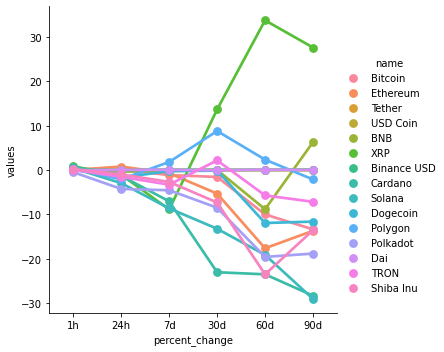

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [57]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

#df8 = df[['name','quote.USD.price','timestamp']]
df8 = df7.query("name == 'Binance USD'")
df8

,name,percent_change,values
36,Binance USD,1h,0.10692
37,Binance USD,24h,-0.00554
38,Binance USD,7d,0.07500
39,Binance USD,30d,0.03141
40,Binance USD,60d,0.04812
41,Binance USD,90d,0.07655


<AxesSubplot:xlabel='percent_change', ylabel='values'>

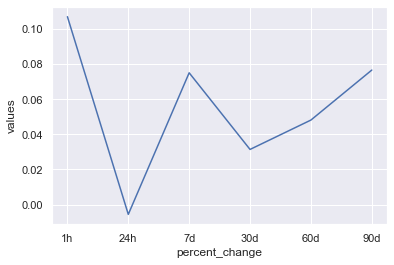

In [58]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='percent_change', y='values', data = df8)